In [5]:
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
#from lime import lime_text
## for word embedding
from nlp_fn import *
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers
import warnings
warnings.filterwarnings("ignore")

I0203 17:29:12.314277 4755813824 file_utils.py:32] TensorFlow version 2.1.0 available.
I0203 17:29:12.797003 4755813824 file_utils.py:39] PyTorch version 1.0.0 available.
I0203 17:29:12.877228 4755813824 modeling_xlnet.py:194] Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


In [6]:
dtf=pd.read_csv("topic-modeled-abstracts-1.csv", index_col=0)
dtf.head()

,Unnamed: 0.1,pubmed_id,mesh_term,abstract,bow_length,dominant_topic,topic_probability,mesh_term_index,clean_text
0,0,33107461,Physical Phenomena,To evaluate and compare the effect of contamin...,59.0,14.0,0.543822,0,evaluate compare effect contamination haemosta...
1,1,33107259,Physical Phenomena,To establish a new mechanical model of distal ...,92.0,5.0,0.399744,0,establish new mechanical model distal humerus ...
2,2,33097152,Physical Phenomena,Various manganese oxides (MnOx) prepared via c...,84.0,16.0,0.421532,0,various manganese oxide mnox prepare via citri...
3,3,33095536,Physical Phenomena,We report a patient with recurrent glioblastom...,24.0,13.0,0.362181,0,report patient recurrent glioblastoma eloquent...
4,4,33089281,Physical Phenomena,To compare the stress distribution of dental i...,75.0,14.0,0.373831,0,compare stress distribution dental implant dif...


In [225]:
dtf.shape

(16388, 9)

In [226]:
dtf=dtf.loc[~dtf.abstract.isna()]
dtf.shape

(14661, 9)

In [6]:
dtf2 = dtf.loc[dtf.topic_probability >= 0.55]
# dtf.head(); dtf.shape

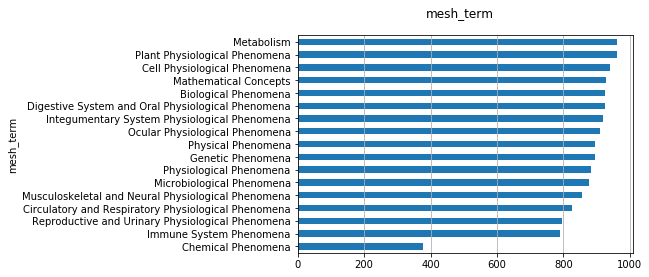

In [203]:

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
fig.suptitle("mesh_term", fontsize=12)
dtf["mesh_term"].reset_index().groupby("mesh_term").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

## Named Entity Recognition (NER) : Extracting Entities

In [181]:
import spacy
ner = spacy.load('en_core_sci_lg')

In [204]:
docs = ner.pipe(dtf.abstract, disable=['tagger', 'parser'])
docs = list(docs)

In [205]:
entities = []
for d in docs:
    doc_ents = []
    for e in d.ents:
        doc_ents.append(e.text)
    entities.append(doc_ents)

In [206]:
dtf['entities'] = entities

In [207]:
dtf['entities'] =dtf['entities'].apply(lambda x: ' '.join(x))

In [208]:
dtf.head()

,Unnamed: 0.1,pubmed_id,mesh_term,abstract,bow_length,dominant_topic,topic_probability,mesh_term_index,clean_text,entities
0,0,33107461,Physical Phenomena,To evaluate and compare the effect of contamin...,59.0,14.0,0.543822,0,evaluate compare effect contamination haemosta...,evaluate compare effect contamination haemosta...
1,1,33107259,Physical Phenomena,To establish a new mechanical model of distal ...,92.0,5.0,0.399744,0,establish new mechanical model distal humerus ...,mechanical model distal humerus children epiph...
2,2,33097152,Physical Phenomena,Various manganese oxides (MnOx) prepared via c...,84.0,16.0,0.421532,0,various manganese oxide mnox prepare via citri...,manganese oxides MnOx citric acid solution com...
3,3,33095536,Physical Phenomena,We report a patient with recurrent glioblastom...,24.0,13.0,0.362181,0,report patient recurrent glioblastoma eloquent...,report patient recurrent glioblastoma eloquent...
4,4,33089281,Physical Phenomena,To compare the stress distribution of dental i...,75.0,14.0,0.373831,0,compare stress distribution dental implant dif...,compare stress distribution dental implants bo...


In [209]:
dtf.groupby("dominant_topic").count()

,Unnamed: 0.1,pubmed_id,mesh_term,abstract,bow_length,topic_probability,mesh_term_index,clean_text,entities
dominant_topic,,,,,,,,,
0.0,2420,2420,2420,2420,2420,2420,2420,2420,2420
1.0,339,339,339,339,339,339,339,339,339
2.0,36,36,36,36,36,36,36,36,36
3.0,861,861,861,861,861,861,861,861,861
4.0,83,83,83,83,83,83,83,83,83
5.0,183,183,183,183,183,183,183,183,183
6.0,457,457,457,457,457,457,457,457,457
7.0,1397,1397,1397,1397,1397,1397,1397,1397,1397
8.0,738,738,738,738,738,738,738,738,738


## Feature Engineering

In [7]:
#stratify
dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3, shuffle= True)  

In [210]:
print("X_train shape:", dtf_train.drop("mesh_term", axis=1).shape, "| X_test shape:", dtf_test.drop(y, axis=1).shape)
print("mesh_term:")
for i in dtf_train["mesh_term"].value_counts(normalize=True).index:
    print(" ", i, " -->  train:", round(dtf_train["mesh_term"].value_counts(normalize=False).loc[i], 2),
                          "| test:", round(dtf_test["mesh_term"].value_counts(normalize=False).loc[i], 2))
print(dtf_train.shape[1], "features:", dtf_train.drop(y, axis=1).columns.to_list())

X_train shape: (10262, 9) | X_test shape: (4399, 9)
mesh_term:
  Metabolism  -->  train: 686 | test: 274
  Plant Physiological Phenomena  -->  train: 671 | test: 289
  Digestive System and Oral Physiological Phenomena  -->  train: 654 | test: 270
  Cell Physiological Phenomena  -->  train: 647 | test: 292
  Mathematical Concepts  -->  train: 642 | test: 287
  Ocular Physiological Phenomena  -->  train: 640 | test: 270
  Integumentary System Physiological Phenomena  -->  train: 640 | test: 280
  Physical Phenomena  -->  train: 636 | test: 260
  Biological Phenomena  -->  train: 636 | test: 289
  Microbiological Phenomena  -->  train: 631 | test: 245
  Genetic Phenomena  -->  train: 614 | test: 281
  Physiological Phenomena  -->  train: 613 | test: 271
  Musculoskeletal and Neural Physiological Phenomena  -->  train: 596 | test: 260
  Circulatory and Respiratory Physiological Phenomena  -->  train: 576 | test: 249
  Immune System Phenomena  -->  train: 559 | test: 230
  Reproductive and 

In [211]:
y_train = dtf_train["mesh_term"].values
y_test = dtf_test["mesh_term"].values

In [212]:
## Count (classic BoW)
#vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2))

--- creating sparse matrix ---
shape: (10262, 713504)
--- creating vocabulary ---
713504 words
--- tokenization ---
10262 texts


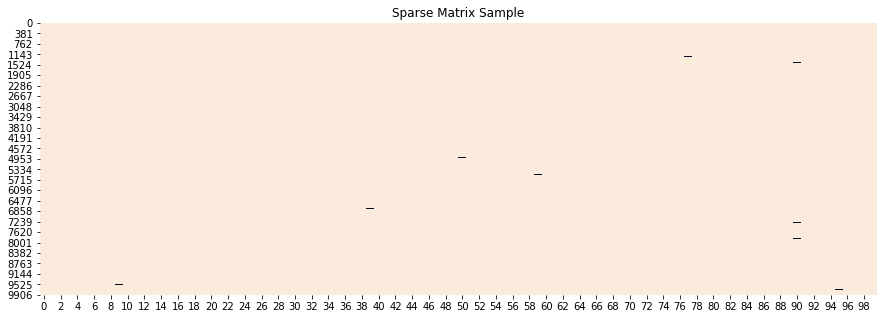

In [213]:
dic_bow = fit_bow(corpus=dtf_train["entities"], vectorizer=vectorizer, vocabulary=None)

In [98]:
dic_bow.keys()


dict_keys(['X', 'lst_text2tokens', 'vectorizer', 'dic_vocabulary', 'X_names'])

In [214]:
X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]
#vectorizer.get_feature_names() same as X_names

In [15]:
# check text conversion
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["clean_text"].iloc[i].split())
print("from: ", dtf_train["clean_text"].iloc[i], "| len:", len_txt)

## list of token ids: [[1, 2, 3], ...]
len_tokens = len(lst_text2tokens[i])
print("to: ", lst_text2tokens[i], "| len:", len(lst_text2tokens[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["clean_text"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["clean_text"].iloc[i].split()[0]])

## words not in vocabulary?
if len_txt-len_tokens != 0:
    missing_words = [word for word in dtf_train["clean_text"].iloc[i].split() if word not in dic_vocabulary.keys()]
    print("!", len_txt-len_tokens, "words not in vocabulary:", missing_words)

from:  simulation base train prove highly effective pedagogical strategy however misalignment participant level expertise difficulty simulation show significant negative impact learn outcome ensure learn outcome achieve propose novel framework adaptive simulation goal identify level expertise learner dynamically modulate simulation complexity match learner capability facilitate development framework investigate classification expertise use biological signal monitor wearable sensor trauma simulation develop electrocardiogram ecg galvanic skin response gsr signal novice expert trauma responder collect signal utilize classify responder expertise successive feature extraction selection use number machine learn method result show feasibility utilize bio signal multimodal expertise classification use adaptive simulation application | len: 96
to:  [758680, 112351, 840003, 663266, 391333, 282823, 607608, 787384, 397053, 526854, 597117, 474838, 316897, 255638, 758680, 751799, 755937, 552737, 41

## Chi2 Feature Selection


In [48]:
# y = dtf_train["mesh_term"]
# X_names = vectorizer.get_feature_names() #Dont do again done above 

        # p_value_limit = 0.95
        # dtf_features = pd.DataFrame()
        # for cat in np.unique(y):
        #     chi2, p = feature_selection.chi2(X_train, y==cat)
        #     dtf_features = dtf_features.append(pd.DataFrame(
        #                    {"feature":X_names, "score":1-p, "y":cat}))
        #     dtf_features = dtf_features.sort_values(["y","score"], 
        #                     ascending=[True,False])
        #     dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
        # X_names = dtf_features["feature"].unique().tolist()

In [169]:
def features_selection(X, y, X_names, top=None, print_top=10):    
    ## selection
    dtf_features = pd.DataFrame()
    for cat in np.unique(y):
        chi2, p = feature_selection.chi2(X, y==cat)
        dtf_features = dtf_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>0.95] #p-value filter
    if top is not None:
        dtf_features = dtf_features.groupby('y')["y","feature","score"].head(top)
    
    ## print
    print("features selection: from", "{:,.0f}".format(len(X_names)), 
          "to", "{:,.0f}".format(len(dtf_features["feature"].unique())))
    print(" ")
    for cat in np.unique(y):
        print("# {}:".format(cat))
        print("  . selected features:", len(dtf_features[dtf_features["y"]==cat]))
        print("  . top features:", ", ".join(dtf_features[dtf_features["y"]==cat]["feature"].values[:print_top]))
        print(" ")
    return dtf_features["feature"].unique().tolist(), dtf_features




In [215]:
X_names, dtf_selection = features_selection(X_train, dtf_train["mesh_term"], X_names, top=None, print_top=10)

features selection: from 713,504 to 16,315
 
# Biological Phenomena:
  . selected features: 846
  . top features: genus, nov, sp, sp nov, species, genitalia, species genus, gen, characters, gulf
 
# Cell Physiological Phenomena:
  . selected features: 915
  . top features: autophagy, cells, apoptosis, cell, tumor, cancer, cancer cells, mir, proliferation, tme
 
# Chemical Phenomena:
  . selected features: 2422
  . top features: chiral, lignin, zirconia, microtubule, resin, coagulants, crystallization, bulk fill, ph, fill
 
# Circulatory and Respiratory Physiological Phenomena:
  . selected features: 989
  . top features: blood pressure, hrv, hypertension, pressure, arterial, systolic, hemodynamic, heart, ventricular, blood
 
# Digestive System and Oral Physiological Phenomena:
  . selected features: 885
  . top features: digestibility, intake, swallowing, teeth, appetite, dysphagia, resorption, occlusal, diets, chewing
 
# Genetic Phenomena:
  . selected features: 787
  . top features:

In [22]:
dtf_selection.sample(6)

,feature,score,y
214369,crf,0.996031,Musculoskeletal and Neural Physiological Pheno...
394031,home base,0.995170,Musculoskeletal and Neural Physiological Pheno...
763675,sleep disorder,0.998887,Musculoskeletal and Neural Physiological Pheno...
323138,eye require,0.955255,Ocular Physiological Phenomena
838740,tp53egfr,0.958419,Genetic Phenomena
673052,rad51c,0.979423,Genetic Phenomena


## Refit the vectorizer on the corpus with this new set of words as input to produce a smaller feature matrix and a shorter vocabulary.


In [21]:
corpus=dtf_train["clean_text"]
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [22]:
len(X_names)

14437

## OR usr fit_bow function from nlp_fn.py

--- creating sparse matrix ---
shape: (10262, 16315)
--- used vocabulary ---
16315 words
--- tokenization ---
10262 texts


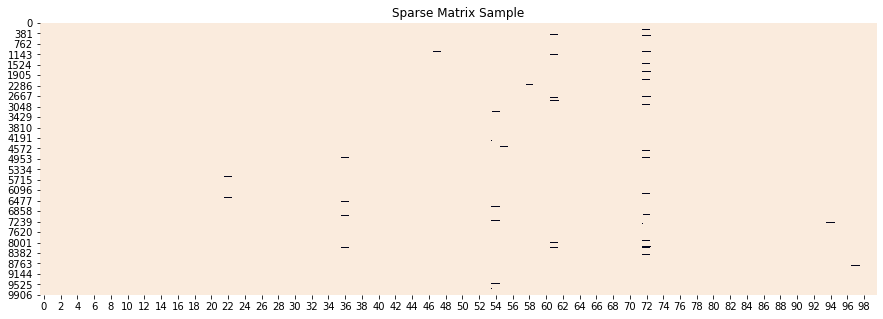

In [216]:
# Recreate Vectorizer with the selected vocabulary
dic_bow = fit_bow(corpus=dtf_train["entities"], vocabulary=X_names)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic_bow["lst_text2tokens"]

In [24]:
def sparse2dtf(X, dic_vocabulary, X_names, prefix=""):
    dtf_X = pd.DataFrame()
    for word in X_names:
        idx = dic_vocabulary[word]
        dtf_X[prefix+word] = np.reshape(X[:,idx].toarray(), newshape=(-1))
    return dtf_X



In [67]:
# Explore the sparse matrix as dtf
dtf_X_train = sparse2dtf(X_train, dic_vocabulary, X_names, prefix="")

In [68]:
dtf_X_train

,adhesion,bacterial load,pilus,bacterial adhesion,tfp,mcr,bacterial,transformation,bacterial translocation,kwl,...,agent remdesivir,hamtsp,cov represent,arrhythmia,2sbs,nucleoside,pfuml,ago2,antibody sars,reporter virus
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.161495,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.114097,0.0,0.0,0.0,0.0,0.0,0.121434,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.102435,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.025341,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7752,0.000000,0.0,0.0,0.0,0.0,0.0,0.048321,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7753,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7754,0.000000,0.0,0.0,0.0,0.0,0.0,0.116675,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7755,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
dtf_X_train = pd.concat([dtf_train[["abstract","mesh_term"]], dtf_X_train.set_index(dtf_train.index)], axis=1)
dtf_X_train.head()

,abstract,mesh_term,adhesion,bacterial load,pilus,bacterial adhesion,tfp,mcr,bacterial,transformation,...,agent remdesivir,hamtsp,cov represent,arrhythmia,2sbs,nucleoside,pfuml,ago2,antibody sars,reporter virus
658,The emergence of multi-drug resistant bacteria...,Bacterial Physiological Phenomena,0.000000,0.0,0.0,0.0,0.0,0.0,0.161495,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2833,"Candida haemulonii complex (C. haemulonii, C. ...","Drug Resistance, Microbial",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,"After implantation into a host, titanium (Ti) ...",Bacterial Physiological Phenomena,0.114097,0.0,0.0,0.0,0.0,0.0,0.121434,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,Bacillus subtilis and Escherichia coli are evo...,Bacterial Physiological Phenomena,0.000000,0.0,0.0,0.0,0.0,0.0,0.102435,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,Introduction. Signal transducer and activator ...,"Drug Resistance, Microbial",0.000000,0.0,0.0,0.0,0.0,0.0,0.025341,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
# Take the raw text for X_test and will be transformed/predicted by the pipeline
X_test = dtf_test["entities"].values

In [70]:
X_train.shape#level2

(7757, 16079)

In [135]:
X_train.shape#level1

(7757, 15863)

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(max_depth=100, max_features=1000, min_samples_leaf=10,
                       n_estimators=300,class_weight='balanced',random_state=0),
    SVC(C=1, kernel='linear',probability=True, class_weight='balanced',random_state=0),
    MultinomialNB(alpha= 0.5, fit_prior=False),
    LogisticRegression(C= 1, max_iter = 100, penalty = 'l2',class_weight='balanced')
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
  #accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)  
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])



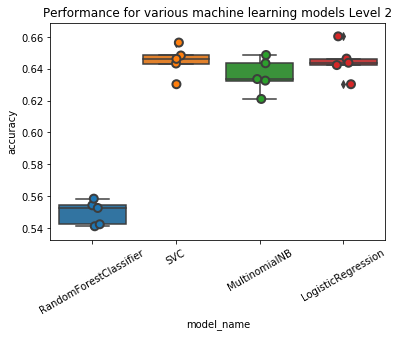

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title('Performance for various machine learning models Level 2' )
ax=sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

In [219]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.554311
1,RandomForestClassifier,1,0.541159
2,RandomForestClassifier,2,0.542398
3,RandomForestClassifier,3,0.552632
4,RandomForestClassifier,4,0.558480
5,SVC,0,0.648320
6,SVC,1,0.630297
7,SVC,2,0.643275
8,SVC,3,0.646199
9,SVC,4,0.656433


In [220]:
entries

[('RandomForestClassifier', 0, 0.5543107647345348),
 ('RandomForestClassifier', 1, 0.5411592791037506),
 ('RandomForestClassifier', 2, 0.5423976608187134),
 ('RandomForestClassifier', 3, 0.5526315789473685),
 ('RandomForestClassifier', 4, 0.5584795321637427),
 ('SVC', 0, 0.648319532391622),
 ('SVC', 1, 0.6302971261568436),
 ('SVC', 2, 0.6432748538011696),
 ('SVC', 3, 0.6461988304093568),
 ('SVC', 4, 0.6564327485380117),
 ('MultinomialNB', 0, 0.6434486117876279),
 ('MultinomialNB', 1, 0.6210423770092548),
 ('MultinomialNB', 2, 0.6325536062378168),
 ('MultinomialNB', 3, 0.6335282651072125),
 ('MultinomialNB', 4, 0.648635477582846),
 ('LogisticRegression', 0, 0.6463711641500244),
 ('LogisticRegression', 1, 0.6302971261568436),
 ('LogisticRegression', 2, 0.6437621832358674),
 ('LogisticRegression', 3, 0.6423001949317739),
 ('LogisticRegression', 4, 0.6603313840155945)]

Accuracy, Precision, Recall-LogisticRegression(C=1)
Accuracy: 0.63
Auc: 0.94
Detail:
                                                     precision    recall  f1-score   support

                               Biological Phenomena       0.63      0.50      0.55       289
                       Cell Physiological Phenomena       0.53      0.67      0.59       292
                                 Chemical Phenomena       0.63      0.32      0.42       101
Circulatory and Respiratory Physiological Phenomena       0.62      0.71      0.66       249
  Digestive System and Oral Physiological Phenomena       0.70      0.76      0.73       270
                                  Genetic Phenomena       0.55      0.57      0.56       281
                            Immune System Phenomena       0.66      0.62      0.64       230
       Integumentary System Physiological Phenomena       0.86      0.78      0.82       280
                              Mathematical Concepts       0.62      0.75     

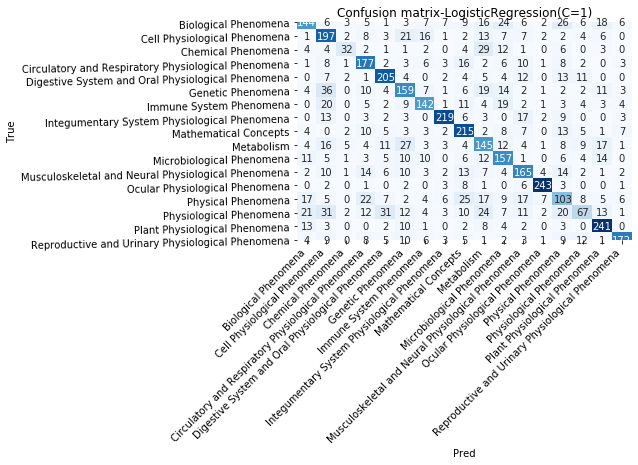

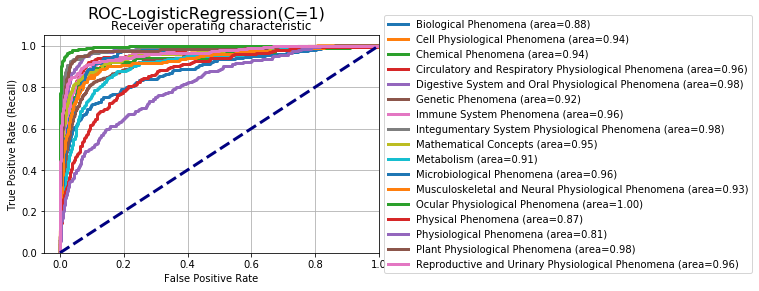

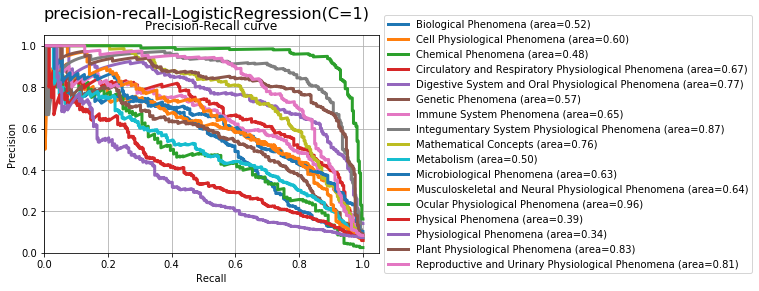

In [221]:
## pipeline
import matplotlib.pyplot as plt
%matplotlib inline 
classifier = [
    
    RandomForestClassifier(max_depth=100, max_features=1000, min_samples_leaf=10,
                       n_estimators=300,class_weight='balanced',random_state=0),
    #SVC(C=1, kernel='linear',probability=True, class_weight='balanced',random_state=0),
    MultinomialNB(alpha= 0.5, fit_prior=False),
    LogisticRegression(C= 1, max_iter = 100, penalty = 'l2',class_weight='balanced')
]
    
entries = []
for X in classifier:
    model_name = X.__class__.__name__
    model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", X)])
    model["classifier"].fit(X_train, y_train)
    X_test = dtf_test["clean_text"].values
    predicted = model.predict(X_test)
    if [a for a in dir(X) if a.startswith('predict_proba')]==['predict_proba']:
        predicted_prob = model.predict_proba(X_test)
    else:
        predicted_prob = model.decision_function(X_test)
    entries.append((model_name,predicted))
    
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
    
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
    print(f'Accuracy, Precision, Recall-{X}')
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))
    
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title=f'Confusion matrix-{X}')
    plt.yticks(rotation=1)
    plt.xticks(rotation=45, ha="right")

    fig, ax = plt.subplots()

## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                               predicted_prob[:,i])
        ax.plot(fpr, tpr, lw=3, 
                  label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.legend(loc="right")
    ax.grid(True)
    fig.suptitle(f'ROC-{X}', fontsize=16)
    
    fig, ax = plt.subplots()
    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax.plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(True)
    fig.suptitle(f'precision-recall-{X}', fontsize=16)
    plt.show()
    
        

## GridSearch

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC, LinearSVC

In [83]:
vectorizer_params = dict(
    ngram_range=(1, 2)
)

In [96]:
svm_pipeline = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(**vectorizer_params)),
    ('svm', LinearSVC())
])

svm_param_grid = {
    'svm__C': np.logspace(-2, 2, 4)
}
clf_svm = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    n_jobs=-1,
    cv=3,
    verbose = 2
    )

clf_svm.fit( X_train, y_train)

sorted(clf_svm.cv_results_.keys())
clf_svm.predict(['expression in cultured human corneal epithelial cells'])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    7.3s finished


GridSearchCV(cv=3, estimator=Pipeline(steps=[('svm', LinearSVC())]), n_jobs=-1,
             param_grid={'svm__C': array([1.00000000e-02, 2.15443469e-01, 4.64158883e+00, 1.00000000e+02])},
             verbose=2)

In [97]:
print("Best parameters: ", clf_svm.best_params_)

# we can also use the best model, which is stored automatically
# clf_keras.predict(df.abstract[:3])


Best parameters:  {'svm__C': 0.21544346900318834}


In [106]:
#RF
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [1000, 5000, 10000],
    'min_samples_leaf': [10,100, 1000],
    'n_estimators': [100, 200, 300]
}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_rf.fit( X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 66.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [1000, 5000, 10000],
                         'min_samples_leaf': [10, 100, 1000],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [107]:
print(grid_rf.best_estimator_)

RandomForestClassifier(max_depth=100, max_features=1000, min_samples_leaf=10,
                       n_estimators=300)


In [101]:
#SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear'} 
svm=SVC()
grid_svm = GridSearchCV(estimator = svm, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_svm.fit( X_train, y_train)
print(grid_svm.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 27.6min finished


NameError: name 'grid' is not defined

In [104]:
print(grid_svm.best_estimator_) 


SVC(C=1, gamma=1, kernel='linear')


In [120]:
MultinomialNB.get_params().keys()


dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [144]:
from sklearn.naive_bayes import MultinomialNB


In [145]:
#MultinomialNB
grid_param = {
  'alpha': (0.5, 1.5, 6),
  'fit_prior': (True, False)  
}

MultinomialNB = MultinomialNB()
grid_NB = GridSearchCV(estimator = MultinomialNB, param_grid = grid_param, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_NB.fit( X_train, y_train)
print(grid_NB.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 0.5, 'fit_prior': False}


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished


In [146]:
print(grid_NB.best_estimator_) 

MultinomialNB(alpha=0.5, fit_prior=False)


In [162]:
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
#logistic regression
grid_params = {
  'penalty': ['none', 'l2'],
# Creating a list of values of the regularization parameter
   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
   'max_iter': [20, 50, 100]
  
}
LogisticRegression= LogisticRegression()
grid_LG = GridSearchCV(estimator = LogisticRegression, param_grid = grid_params, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_LG.fit( X_train, y_train)
print(grid_LG.best_params_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:  2.4min finished


{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [35]:
print(grid_LG.best_estimator_) 

LogisticRegression(C=1)
